In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('../../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [4]:
df['year'] = df['Day'].apply(lambda x: x.year)

In [5]:
years = sorted(list(set(list(df['year'].values))))

In [6]:
mean_t = []
for i in years:
    d = df.loc[df['year'] == i]
    mean_t.append(d['t'].mean())
tt = sorted(list(zip(mean_t, years)))

In [7]:
tt[0], tt[-1]

((6.980821917808219, 2012), (9.07945205479452, 2015))

**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [8]:
df['month'] = df['Day'].apply(lambda x: x.month)
d1 = df.loc[df['month'] == 1]

In [9]:
warm = []
for i in years:
    d = d1.loc[d1['year'] == i]
    d = d.loc[d['t'] >= 0]
    warm.append(d['t'].count())
tt = sorted(list(zip(warm, years)))
tt[-1]

(19, 2008)

**3.** В каком году было самое холодное лето (по средней температуре)

In [10]:
d1 = df.loc[df['month'].isin([6, 7, 8])]
mean_t = []
for i in years:
    d = d1.loc[d1['year'] == i]
    mean_t.append(d['t'].mean())
tt = sorted(list(zip(mean_t, years)))
tt[0]

(18.119565217391305, 2008)

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [11]:
temp = df['t'].values
diff = abs(temp - np.roll(temp, -1))
print(max(diff))
df.iloc[np.argmax(diff):np.argmax(diff) + 2]

15


,Day,t,year,month
2334,2014-05-26,22,2014,5
2335,2014-05-27,7,2014,5


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

In [12]:
mean_t = []
for i in years:
    d = df.loc[df['year'] == i]
    mean_t.append(d['t'].mean())

In [13]:
plotly.offline.init_notebook_mode(connected=True)
iplot({
    "data": [go.Scatter(x=(years), y=mean_t)],
    "layout": go.Layout(title='Среднегодовые температуры',
                        xaxis = dict(title = 'Год'),
                        yaxis = dict(title = 'Средняя температура'))
})

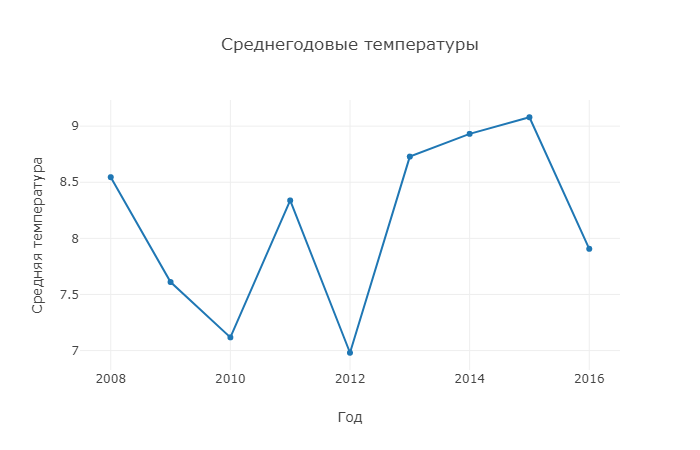

In [14]:
from IPython.display import Image
Image(filename='newplot.png')